# Question 1

In [11]:
import pandas as pd

# Dataset importing
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

# Mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Male ratio per occupation and sort it from the most to the least
gender_count = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
gender_count['total'] = gender_count.sum(axis=1)
gender_count['male_ratio'] = gender_count['M'] / gender_count['total']
male_ratio_sorted = gender_count['male_ratio'].sort_values(ascending=False)

# The minimum and maximum ages for each occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# The mean age for each combination of occupation and sex
mean_age_per_occ_gender = users.groupby(['occupation', 'gender'])['age'].mean().unstack()

# The percentage of women and men for each occupation
gender_count['male_percentage'] = (gender_count['M'] / gender_count['total']) * 100
gender_count['female_percentage'] = (gender_count['F'] / gender_count['total']) * 100
gender_percentage = gender_count[['male_percentage', 'female_percentage']]


print("Mean age per occupation:\n", mean_age_per_occupation)
print("\nMale ratio per occupation (sorted):\n", male_ratio_sorted)
print("\nMinimum and maximum ages per occupation:\n", min_max_age_per_occupation)
print("\nMean age per occupation and gender:\n", mean_age_per_occ_gender)
print("\nPercentage of men and women per occupation:\n", gender_percentage)


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other    

# Question 2

In [65]:
import pandas as pd

# Dataset Importing
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# 'Goals' column
goals = euro12['Goals']

# Number of teams participated in the Euro 2012
num_teams = euro12['Team'].nunique()

# Number of columns in the dataset
num_columns = euro12.shape[1]

# Assigning columns to a dataframe called discipline, ('Team', 'Yellow Cards', and 'Red Cards')
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Teams sorted by 'Red Cards', then by 'Yellow Cards'
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

# The mean 'Yellow Cards' given per team
mean_yellow_cards = euro12['Yellow Cards'].mean()

# Teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Teams that start with 'G'
teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]

# The first 7 columns
first_7_columns = euro12.iloc[:, :7]

# All columns except the last 3
all_but_last_3_columns = euro12.iloc[:, :-3]

# 'Shooting Accuracy' from England, Italy, and Russia
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]


print("Goals column:\n", goals)
print("\nNumber of teams participated:", num_teams)
print("\nNumber of columns in the dataset:", num_columns)
print("\nDiscipline dataframe:\n", discipline)
print("\nTeams sorted by Red and Yellow Cards:\n", discipline_sorted)
print("\nMean Yellow Cards per team:", mean_yellow_cards)
print("\nTeams that scored more than 6 goals:\n", teams_more_than_6_goals)
print("\nTeams starting with 'G':\n", teams_start_with_g)
print("\nFirst 7 columns:\n", first_7_columns)
print("\nAll columns except the last 3:\n", all_but_last_3_columns)
print("\nShooting Accuracy of England, Italy, and Russia:\n", shooting_accuracy_selected_teams)


Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams participated: 16

Number of columns in the dataset: 35

Discipline dataframe:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain          

# Question 3

In [63]:
import pandas as pd
import numpy as np

# 3 different Series
np.random.seed(42)  # Ensures reproducibility
series1 = pd.Series(np.random.randint(1, 5, 100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, 100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, 100))  # Random numbers from 10,000 to 30,000

# DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Name change of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# One-column DataFrame with the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))

# Checking if it goes only until index 99
print("Does the bigcolumn index end at 99?")
print(bigcolumn.index.max())  # Check the maximum index

# Reindexing the DataFrame so it goes from 0 to 299
bigcolumn_reset = bigcolumn.reset_index(drop=True)


print("DataFrame with Columns:\n", df.head())
print("\nReindexed Bigcolumn:\n", bigcolumn_reset.head())

Does the bigcolumn index end at 99?
99
DataFrame with Columns:
    bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047

Reindexed Bigcolumn:
    0
0  3
1  4
2  1
3  3
4  3


# Question 4

In [17]:
import pandas as pd
import numpy as np

# Dataset Importing
file_path = r"C:\Users\USER\Desktop\Problem set 3\wind.txt"
columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 
           'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
data = pd.read_csv(file_path, sep=r'\s+', names=columns)  # Use `sep=r'\s+'` for whitespace delimiter

# Converting Yr, Mo, Dy to numeric
data['Yr'] = pd.to_numeric(data['Yr'], errors='coerce')
data['Mo'] = pd.to_numeric(data['Mo'], errors='coerce')
data['Dy'] = pd.to_numeric(data['Dy'], errors='coerce')

# Replacing the first 3 columns with a proper datetime index
data['Date'] = pd.to_datetime(dict(year=data['Yr'] + 1900, month=data['Mo'], day=data['Dy']))
data = data.set_index('Date')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])

# Fixing the year 2061 issue
data.index = data.index.map(lambda date: date.replace(year=date.year - 100) if date.year > 2023 else date)

# Values missing for each location
missing_values = data.isnull().sum()

# Total of non-missing values
non_missing_values = data.notnull().sum().sum()

# The mean windspeed over all locations and times
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
mean_windspeed = data.mean().mean()

# DataFrame called loc_stats with min, max, mean, and std dev for each location
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]

# DataFrame called day_stats with min, max, mean, and std dev for each day
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)

# The average windspeed in January for each location
january_data = data[data.index.month == 1]
average_january_windspeed = january_data.mean()

# Downsampling the record to a yearly frequency for each location
yearly_data = data.resample('YS').mean()  # 'YS' replaces 'AS'

# Downsampling the record to a monthly frequency for each location
monthly_data = data.resample('MS').mean()  # 'MS' replaces 'M'

# Downsampling the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()

# The min, max, mean, and std dev of windspeeds across all locations for each week
weekly_stats = weekly_data.aggregate(['min', 'max', 'mean', 'std'], axis=1)


print("Missing values for each location:\n", missing_values)
print("\nTotal non-missing values:", non_missing_values)
print("\nMean windspeed over all locations and times:", mean_windspeed)
print("\nLocation statistics:\n", loc_stats)
print("\nDay statistics (sample):\n", day_stats.head())
print("\nAverage windspeed in January for each location:\n", average_january_windspeed)
print("\nYearly data (sample):\n", yearly_data.head())
print("\nMonthly data (sample):\n", monthly_data.head())
print("\nWeekly data (sample):\n", weekly_data.head())
print("\nWeekly statistics (sample):\n", weekly_stats.head())


Missing values for each location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78869

Mean windspeed over all locations and times: 10.227982360836938

Location statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day statistics (sample):
              min    max       mean       std
Date                                        
NaT          NaN    NaN        NaN       NaN
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.5

# Question 5

In [71]:
import pandas as pd
# Data Importing
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Assigning it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

# The first 10 entries
print("First 10 entries:")
print(chipo.head(10))

# The number of observations in the dataset
num_observations = chipo.shape[0]
print("\nNumber of observations:", num_observations)

# The number of columns in the dataset
num_columns = chipo.shape[1]
print("\nNumber of columns:", num_columns)

# The name of all the columns
print("\nColumn names:")
print(chipo.columns.tolist())

# How the dataset is indexed
print("\nDataset index:")
print(chipo.index)

# The most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("\nMost-ordered item:", most_ordered_item)

# For the most-ordered item, the amount of items that were ordered
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nNumber of items ordered for the most-ordered item:", most_ordered_item_count)

# The most ordered item in the choice_description column
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("\nMost-ordered item in the choice_description column:", most_ordered_choice)

# Items were ordered in total
total_items_ordered = chipo['quantity'].sum()
print("\nTotal items ordered:", total_items_ordered)

# Converting item price to a float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# The item price type
print("\nItem price type after conversion:", chipo['item_price'].dtype)

# The revenue for the period in the dataset
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()
print("\nTotal revenue:", total_revenue)

# Orders made in the period
total_orders = chipo['order_id'].nunique()
print("\nTotal orders made:", total_orders)

# The average revenue amount per order
average_revenue_per_order = total_revenue / total_orders
print("\nAverage revenue per order:", average_revenue_per_order)

# Number of different items sold
num_different_items = chipo['item_name'].nunique()
print("\nNumber of different items sold:", num_different_items)


First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

# Question 6

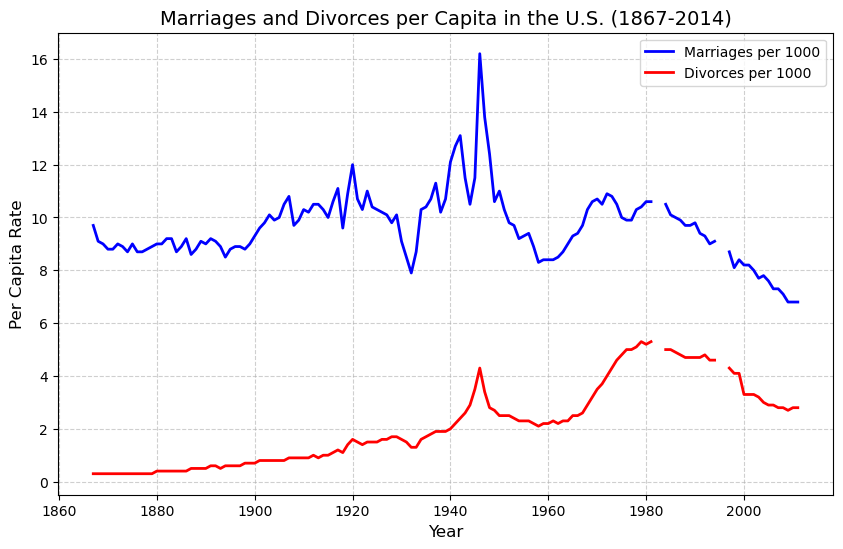

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Loading
file_path = r"C:\Users\USER\Desktop\Problem set 3\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# The line plot
plt.figure(figsize=(10, 6))

# marriages and divorces per 1000 people
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='blue', linewidth=2)
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='red', linewidth=2)

# labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Per Capita Rate', fontsize=12)
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)', fontsize=14)

# legend
plt.legend()

# The grid and plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Question 7

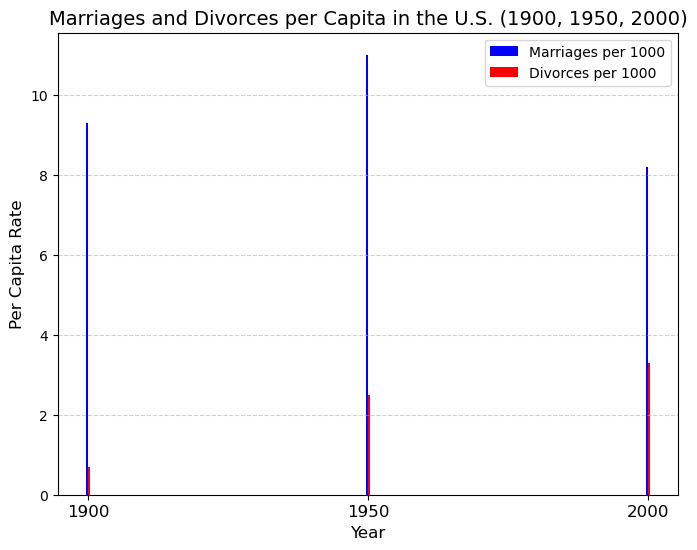

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Loading
file_path = r"C:\Users\USER\Desktop\Problem set 3\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Filtering the data for the selected years (1900, 1950, 2000)
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# The bar chart
plt.figure(figsize=(8, 6))

# Bar positions
x = filtered_data['Year']
width = 0.35  # Width of the bars

# Bars plotting
plt.bar(x - width/2, filtered_data['Marriages_per_1000'], width, label='Marriages per 1000', color='blue')
plt.bar(x + width/2, filtered_data['Divorces_per_1000'], width, label='Divorces per 1000', color='red')

# labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Per Capita Rate', fontsize=12)
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontsize=14)
plt.xticks(x, fontsize=12)
plt.legend()


plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Question 8

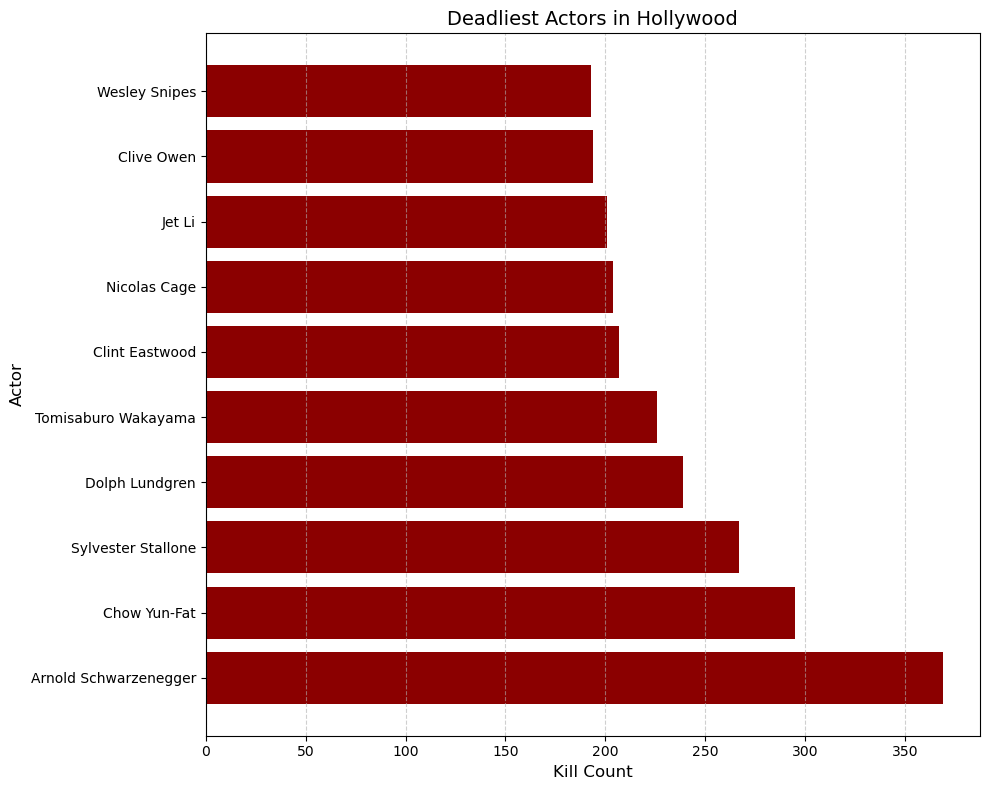

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Loading
file_path = r"C:\Users\USER\Desktop\Problem set 3\actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sorting the data by kill count in descending order
sorted_data = data.sort_values(by='Count', ascending=False)

# Horizontal bar chart
plt.figure(figsize=(10, 8))

# Plotting horizontal bars
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='darkred')

# labels, title, and grid
plt.xlabel('Kill Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('Deadliest Actors in Hollywood', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# layout for better visualization and the plot
plt.tight_layout()
plt.show()

# Question 9

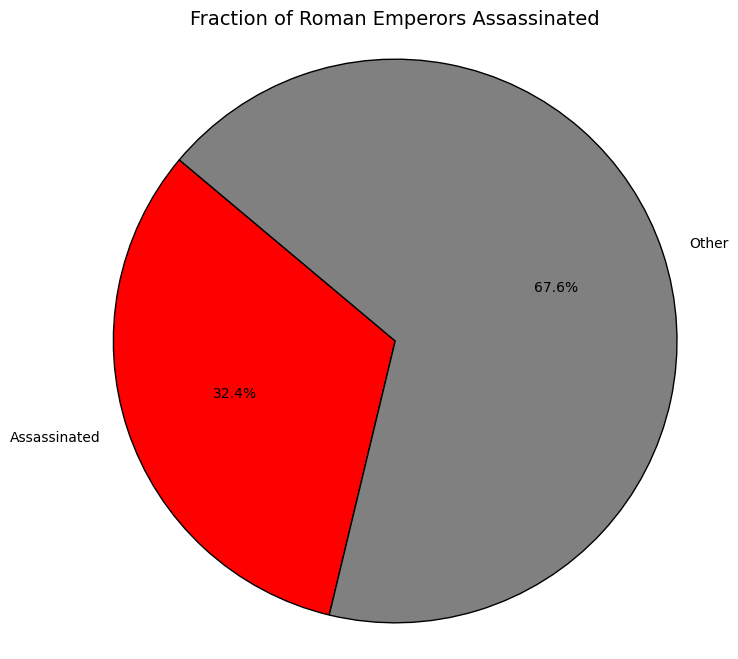

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Loading
file_path = r"C:\Users\USER\Desktop\Problem set 3\roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# The count of each cause of death
cause_counts = data['Cause_of_Death'].value_counts()

# Separation of the count for 'Assassinated' and combine all other causes as 'Other'
assassinated_count = cause_counts.get('Assassinated', 0)
other_count = cause_counts.sum() - assassinated_count

# Data preparation for the pie chart
labels = ['Assassinated', 'Other']
sizes = [assassinated_count, other_count]
colors = ['red', 'gray']

# The pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Fraction of Roman Emperors Assassinated', fontsize=14)


plt.axis('equal')

plt.show()

# Question 10

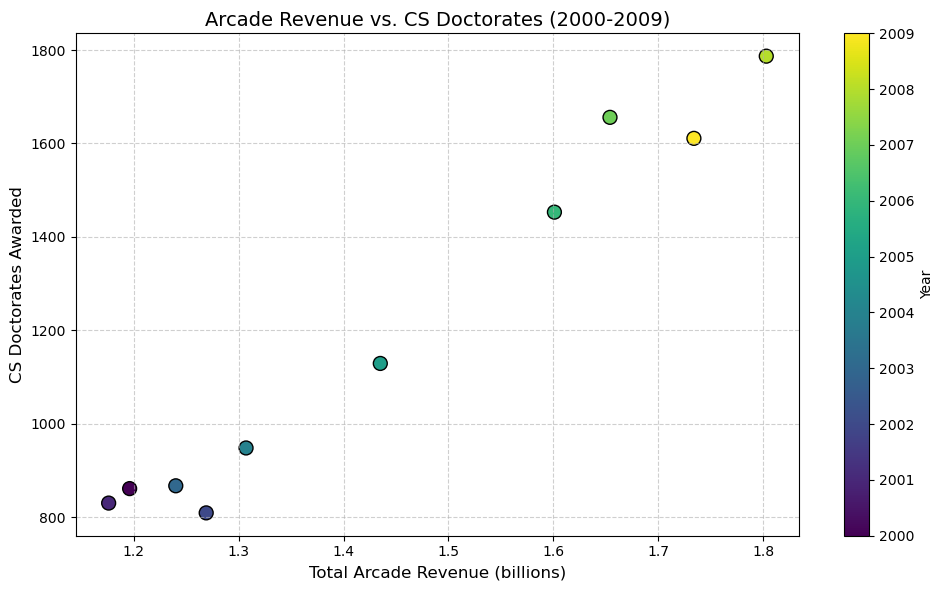

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Loading
file_path = r"C:\Users\USER\Desktop\Problem set 3\arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Scatter plot
plt.figure(figsize=(10, 6))

# Plotting the data
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'],  # Color by year
    cmap='viridis',
    edgecolor='k',
    s=100
)

# Color bar
plt.colorbar(scatter, label='Year')

# labels and title
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('CS Doctorates Awarded', fontsize=12)
plt.title('Arcade Revenue vs. CS Doctorates (2000-2009)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()